In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import rosbag
import traceback
import yaml

In [3]:
def loadBagFile(bag):
    """Load a given bag file"""

    current_bag = ''
    
    try:
        #Read the bag.
        current_bag = rosbag.Bag(bag)
        
        #Load the bag info into a dictionary.
        info_dict = yaml.load(current_bag._get_yaml_info())
        # store the topics.
        current_bag_of_topics = info_dict['topics']

        print "Bag file: "+ bag + " <-- LOADED!"
        print "Topics found:"
        
        # TODO: try catch the case where there's no topics, currently a potential fatal error.
        for top in current_bag_of_topics:
            print "\t- " + top["topic"] + "\n\t\t-Type: " + \
                 top["type"] + "\n\t\t-Fps: " + str(top["frequency"]) \
                 + "\n\t\t-Messages: " + str(top["messages"])
    except:
        print "Error in file: " + bag + ':\t\n' + traceback.format_exc()
    
    return current_bag

In [4]:
bag = loadBagFile('leg_norm_clusters.bag')

Bag file: leg_norm_clusters.bag <-- LOADED!
Topics found:
	- /clusters
		-Type: leg_tracker/ClusterArray
		-Fps: 10.0409
		-Messages: 1265


In [5]:
def extractTopic(bag,topic_name):
    """Sets the bag_data dictionary with the content of the loaded bag.
        bag[topic_name]["msg"] : list of msgs in the bag for the the given topic (topicName).
        bag[topic_name]["s_time"] : time of the first msg in the bag for the given topic
        bag[topic_name]["time_buffer_secs"] : list of msg arrival times (in secs) for the given bag.
    """
    data = []

    for topic, msg, t in bag.read_messages(topics=[topic_name]):
        try:
            data.append(msg)             # append msg
        except:    
            self.logger.debug("Error: " + topic)
    return data

Messages has: 9 clusters


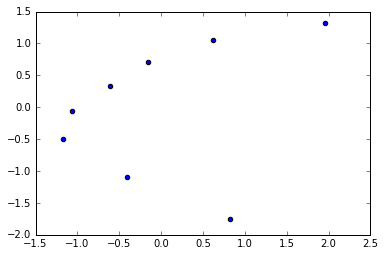

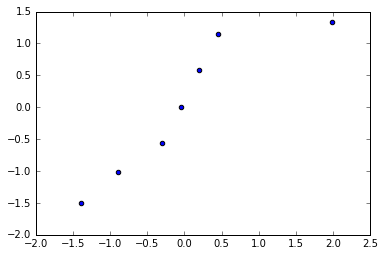

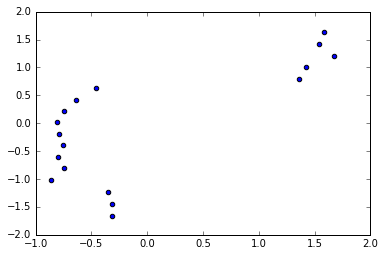

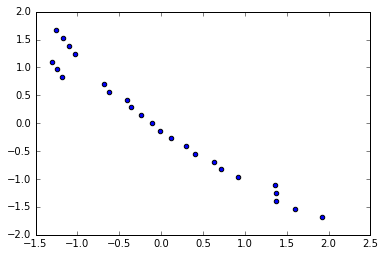

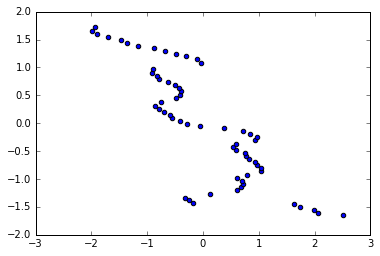

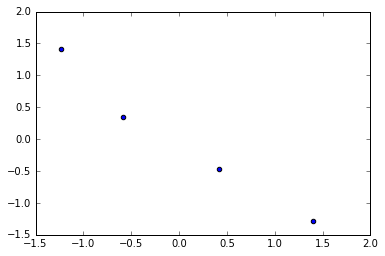

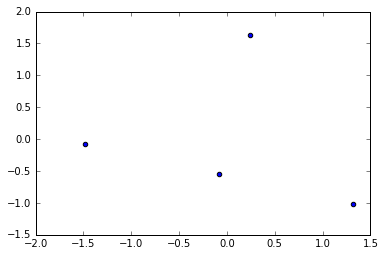

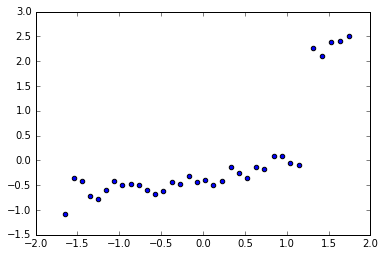

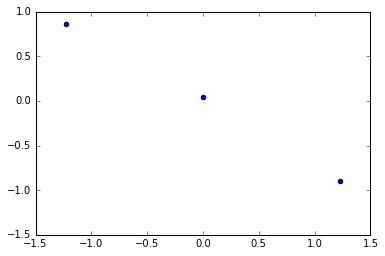

In [8]:
data = extractTopic(bag,"/clusters")

msg_num = 3
cluster_num = len(data[msg_num].clusters)
print "Messages has: {} clusters".format(cluster_num)
for c in range(cluster_num):
    X = []
    for d in data[msg_num].clusters[c].samples:
        X.append([d.x, d.y])
    X = np.array(X)
    plt.scatter(X[:,0], X[:,1])
    plt.show()